### Diabetes Dataset

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.svm import SVC
%matplotlib inline


In [2]:
#Loading Data
diabetes_data = pd.read_csv("Resources/diabetes.csv")
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Loading and Preprocessing Data

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes_data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [5]:
clean_data = diabetes_data.copy()

In [6]:
clean_data[clean_data.columns[1:5]]==0

,Glucose,BloodPressure,SkinThickness,Insulin
0,False,False,False,True
1,False,False,False,True
2,False,False,True,True
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
763,False,False,False,False
764,False,False,False,True
765,False,False,False,False
766,False,False,True,True


In [7]:
diabetes_2 = clean_data[~(clean_data[clean_data.columns[1:5]]==0).any(axis=1)]
diabetes_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [8]:
# Define features set

X = diabetes_2.copy()
X.drop("Outcome",axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [9]:
#check the shape
X.shape

(393, 8)

In [10]:
# Define target vector
y = diabetes_2["Outcome"].ravel()
y[:5]

array([0, 1, 1, 1, 1])

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
#Spliting the data 
x = diabetes_2.drop(columns = ['Outcome'])
y = diabetes_2.Outcome

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [14]:
y

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 393, dtype: int64

In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [16]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [17]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
#Standardisation
diabetes_scaled = StandardScaler().fit_transform(diabetes_2)

In [19]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    diabetes_scaled,
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
)

# Display sample data
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.714756,-1.092023,-0.372636,-0.584110,-0.521857,-0.680346,-1.026232,-0.965915,-0.703062
1,-1.026520,0.467278,-2.457845,0.559379,0.102157,1.401481,5.034808,0.212067,1.422349
2,-0.091229,-1.449362,-1.655841,0.273506,-0.572453,-0.277859,-0.794764,-0.475089,1.422349
3,-0.402992,2.416403,-0.051834,1.512286,3.264391,-0.347254,-1.051951,2.175369,1.422349
4,-0.714756,2.156520,-0.853838,-0.584110,5.819477,-0.402769,-0.366119,2.764360,1.422349


### Outcomes and Visualisations

In [20]:
diabetes_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


/Users/hamda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

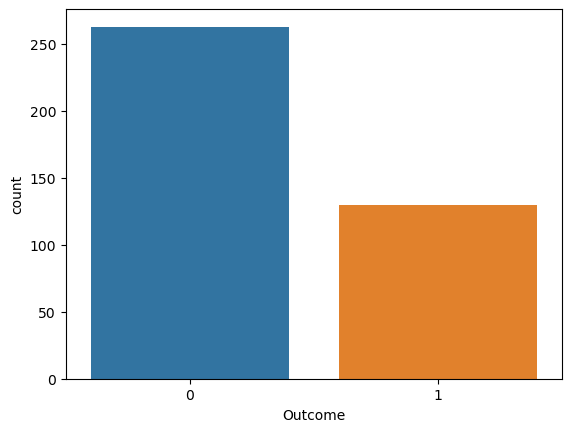

In [21]:
sns.countplot(diabetes_2['Outcome'],label="Count")

In [24]:
#Pregnant Outcome- Diabetes or No Diabetes
np.sort(diabetes_2.Pregnancies.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

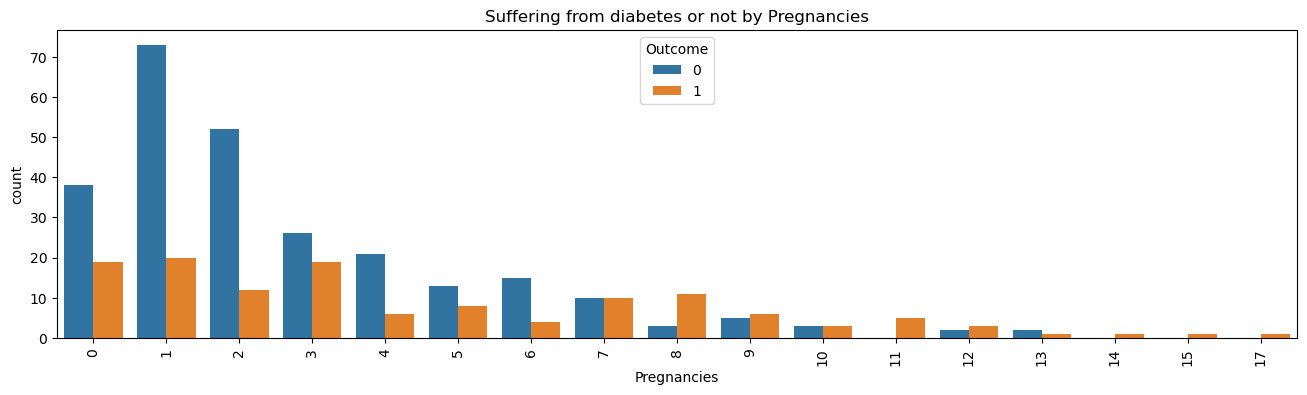

In [25]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes_2.Pregnancies , hue= diabetes_2.Outcome)
ax.set_title('Suffering from diabetes or not by Pregnancies')
plt.show()

In [26]:
#Blood Pressure Outcome- Diabetes or No Diabetes
np.sort(diabetes_2.BloodPressure.unique())

array([ 24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  65,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
        85,  86,  88,  90,  92,  94,  98, 100, 102, 106, 110])

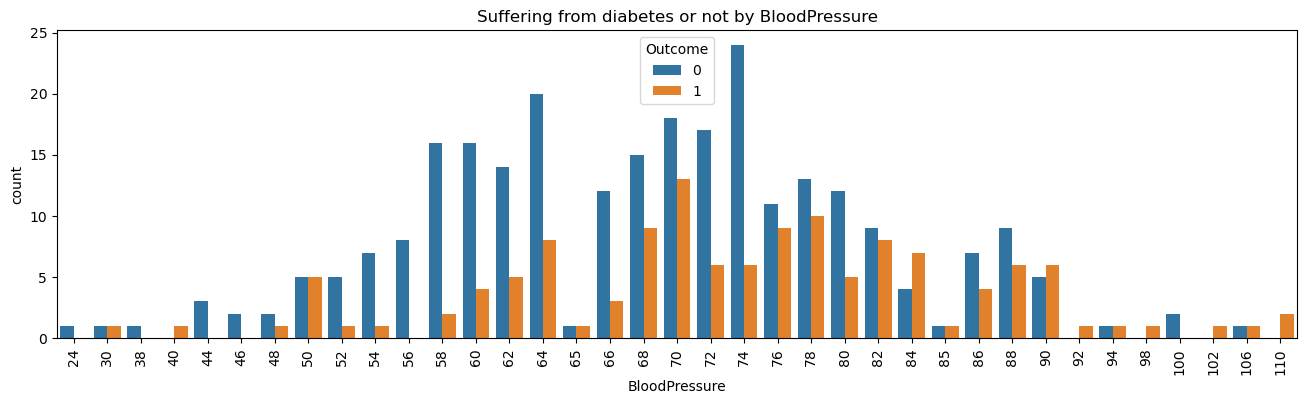

In [27]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes_2.BloodPressure , hue= diabetes_2.Outcome)
ax.set_title('Suffering from diabetes or not by BloodPressure')
plt.show()

In [30]:
#Age Outcome- Diabetes or No Diabetes
np.sort(diabetes_2.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 63, 81])

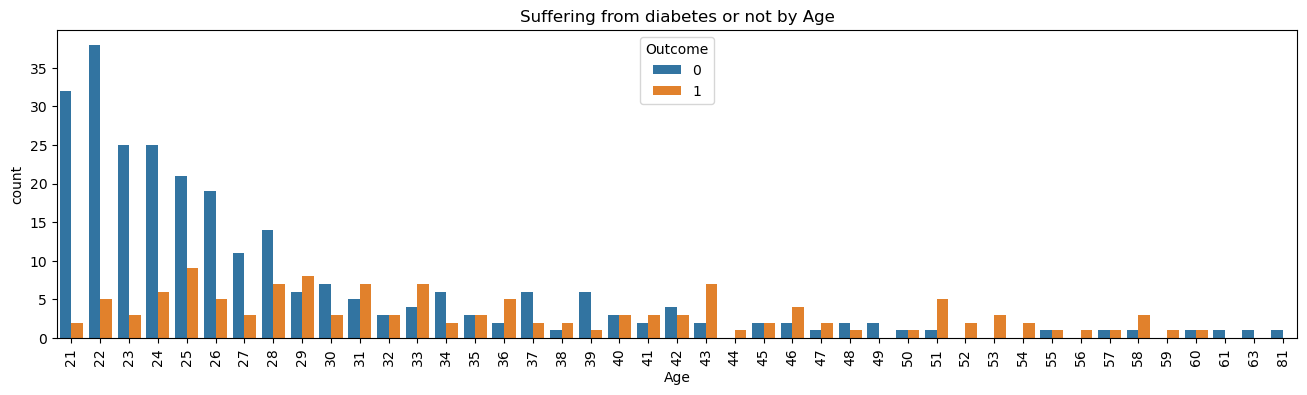

In [31]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes_2.Age , hue= diabetes_2.Outcome)
ax.set_title('Suffering from diabetes or not by Age')
plt.show()

### Logistic Regression 

In [32]:
# instantiate the Logistic Regression model
logistic_reg = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_reg.fit(X_train, y_train)

/Users/hamda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [33]:
#Make predictions using the testing data
predictions = logistic_reg.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [34]:
confusion_matrix(y_test,predictions)

array([[60, 15],
       [11, 13]])

In [35]:
# Print the balanced_accuracy score of the model 
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, predictions)}")

Balanced Accuracy Score: 0.6708333333333334
